In [6]:
import time
import hydroeval as he
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import sys
from datetime import date
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from scipy.stats import sem
from sklearn.metrics import mean_squared_error
import math
from scipy import stats
import statistics
import os

#### **Distribution of Partial Duration Maximums Data Count per Duration**

In [8]:
# Read the input CSV file
df1 = pd.read_csv('./DataFolder/a4_alltime_partial_duration_max_summary.csv')
xa = df1.to_xarray()

# mean 
mn30m = xa['30-min-count']; mn1h = xa['1-hour-count']; mn2h = xa['2-hour-count']; 
mn3h = xa['3-hour-count']; mn6h = xa['6-hour-count']; mn12h = xa['12-hour-count']; 
mn24h = xa['24-hour-count']; mn48h = xa['48-hour-count']; mn72h = xa['72-hour-count'];


mn = [mn30m, mn1h, mn2h, mn3h, mn6h, mn12h, mn24h, mn48h, mn72h]

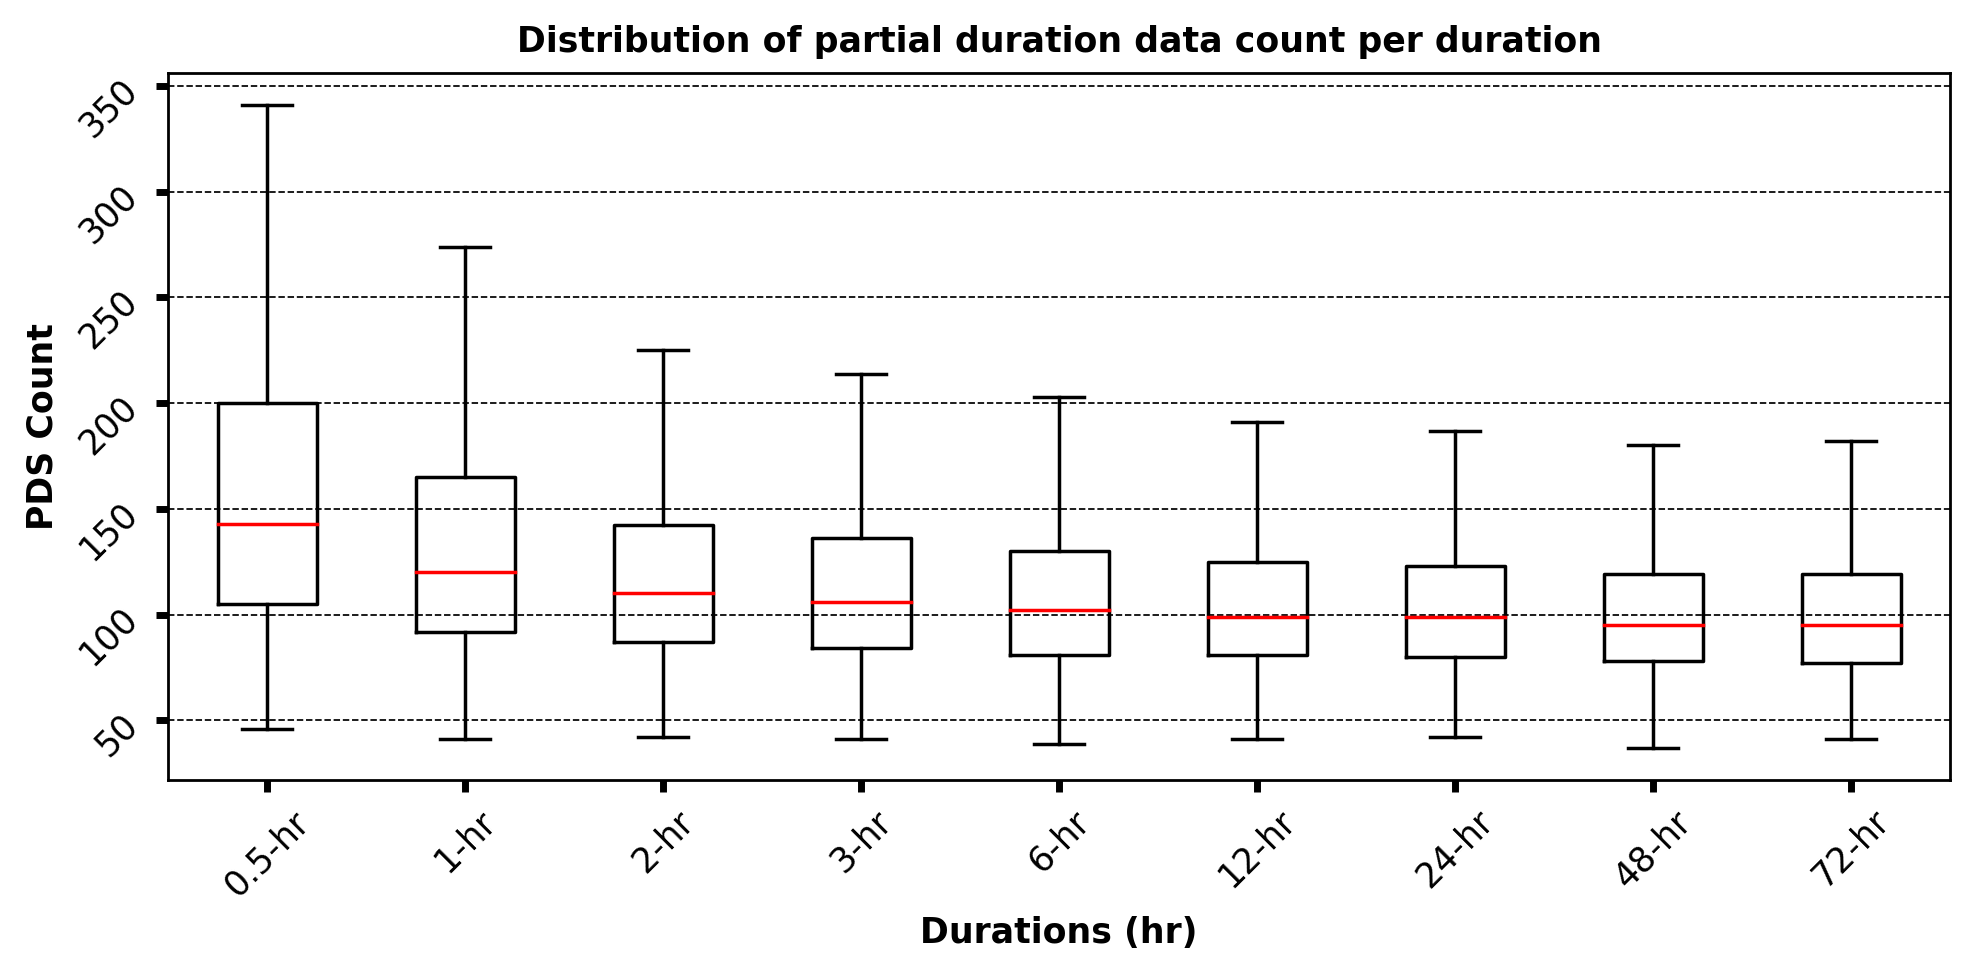

In [9]:
# Plot for each Duration
plt.figure(figsize=(8, 4), dpi=250) 
yylabel = 'PDS Count'; 
xxlabel = 'Durations (hr)';
labels = ['0.5-hr', '1-hr', '2-hr', '3-hr', '6-hr', '12-hr', '24-hr', '48-hr', '72-hr'];
SN = [1, 2, 3, 4, 5, 6, 7, 8, 9];

# mn
plt.boxplot(mn, showfliers=False, medianprops = dict(color = "red", linewidth = 1))
plt.title("Distribution of partial duration data count per duration",  fontweight='bold', fontsize=10)
plt.ylabel(yylabel, fontweight='bold', fontsize=10)
plt.xlabel(xxlabel, fontweight='bold', fontsize=10)
plt.xticks(SN, labels,  rotation=45, fontsize=5, color='black') 
plt.yticks(rotation=45, fontsize=5, color='black') 
plt.tick_params(axis='both', which='major', labelsize=10, width=2)
plt.grid(True, linestyle='--', linewidth='0.5', color='black', axis='y')
# plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)  # Solid line at y=0.5



plt.tight_layout()
plt.savefig("Plots/z4_data_count")
plt.show()

#### **Summary of Partial Duration Maximums Data Count per Duration**

In [5]:
"""
Summarize count data for given durations by computing percentiles, mean, and standard deviation.

"""

def summarize_precipitation_datacounts(input_file, output_file):

    # Step 1: Read the input data
    data = pd.read_csv(input_file, float_precision='round_trip')

    # Step 2: Define input and output duration mappings
    input_columns = [
        '30-min-count', '1-hour-count', '2-hour-count', '3-hour-count',
        '6-hour-count', '12-hour-count', '24-hour-count', '48-hour-count', '72-hour-count'
    ]
    output_columns = ['30m', '1h', '2h', '3h', '6h', '12h', '24h', '48h', '72h']

    # Step 3: Define percentiles to compute
    percentiles = [0, 2.5, 25, 50, 75, 97.5, 99, 99.5, 99.8, 100]

    # Step 4: Initialize DataFrame to hold percentile summaries
    summary_df = pd.DataFrame({'Percentile': percentiles})

    # Step 5: Compute percentiles for each duration column
    for in_col, out_col in zip(input_columns, output_columns):
        summary_df[out_col] = [np.percentile(data[in_col].dropna(), p) for p in percentiles]

    # Step 6: Compute mean, standard deviation, and sum for each column
    mean_row = pd.DataFrame({
        'Percentile': ['mean'],
        **{out_col: [data[in_col].mean()] for in_col, out_col in zip(input_columns, output_columns)}
    })
    stdev_row = pd.DataFrame({
        'Percentile': ['stdev'],
        **{out_col: [data[in_col].std(ddof=1)] for in_col, out_col in zip(input_columns, output_columns)}
    })
    sum_row = pd.DataFrame({
        'Percentile': ['sum'],
        **{out_col: [data[in_col].sum()] for in_col, out_col in zip(input_columns, output_columns)}
    })

    # Step 7: Combine all results
    summary_df = pd.concat([summary_df, mean_row, stdev_row, sum_row], ignore_index=True)

    # Step 8: Save results to CSV
    summary_df.to_csv(output_file, index=False)

    print(f"Summary statistics successfully written to '{output_file}'.")


# Function Inputs:
input_file = "./DataFolder/a4_alltime_partial_duration_max_summary.csv"
output_file = "Stat_folder/5_partial_duration_data_summary.csv"

# Run Function
summarize_precipitation_datacounts(input_file, output_file)


Summary statistics successfully written to 'Stat_folder/5_partial_duration_data_summary.csv'.
